In [1]:
import pandas as pd
import numpy as np

# Load Data
The data used for this assignment is from https://grouplens.org/datasets/movielens/latest/ using the small set.

In [2]:
movies = pd.read_csv('ml-latest-small/movies.csv')

In [3]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [4]:
tags = pd.read_csv('ml-latest-small/tags.csv')

In [5]:
links = pd.read_csv('ml-latest-small/links.csv')

# Manipulate Data

Extract the year from the movie title and store it in a seperate column (not all movies have the year so those will have a value of 0)

In [6]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False).astype('float64').fillna(0).astype('int64')

In [7]:
movies.dtypes

movieId     int64
title      object
genres     object
year        int64
dtype: object

In [8]:
movies.shape

(9742, 4)

In [9]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


retrieve all the genres available in the movies table

In [10]:
genres = set(movies['genres'].str.cat(sep='|').split('|'))

In [11]:
genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [12]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [13]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Data Aggregation 

In [14]:
movie_data = pd.merge(ratings, movies, on='movieId')

In [15]:
movie_data.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


In [127]:
rating_mean = movie_data.groupby('movieId')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'ratingAvg'})

In [128]:
rating_mean.head()

,movieId,ratingAvg
0,53355,5.0
1,96608,5.0
2,33138,5.0
3,128087,5.0
4,3851,5.0


In [130]:
pd.merge(movies_list,rating_mean, on='movieId')

,movieId,title,genres,year,close_score,ratingAvg
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0.000000,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,0.111111,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0.074074,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0.071429,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,0.105263,3.071429
5,6,Heat (1995),Action|Crime|Thriller,1995,0.000000,3.946078
6,7,Sabrina (1995),Comedy|Romance,1995,0.111111,3.185185
7,8,Tom and Huck (1995),Adventure|Children,1995,0.000000,2.875000
8,9,Sudden Death (1995),Action,1995,0.086957,3.125000
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,0.000000,3.496212


In [18]:
rating_count = movie_data.groupby('movieId')['rating'].count().sort_values(ascending=False).reset_index().rename(columns={'rating':'count'})

In [19]:
rating_count_mean = pd.merge(rating_count, rating_mean, on='movieId')

In [20]:
rating_count_mean.head()

,movieId,count,ratingAvg
0,356,329,4.164134
1,318,317,4.429022
2,296,307,4.197068
3,593,279,4.161290
4,2571,278,4.192446


In [21]:
movie_data.loc[movie_data['movieId'] == 1]

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


# Movie Recommendation System

## Using correlation between the ratings

This bit is all from https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/

In [22]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean()) 

In [23]:
ratings_mean_count.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [24]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())  

In [25]:
ratings_mean_count.head()

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Reset the index as the grouping mixes them up

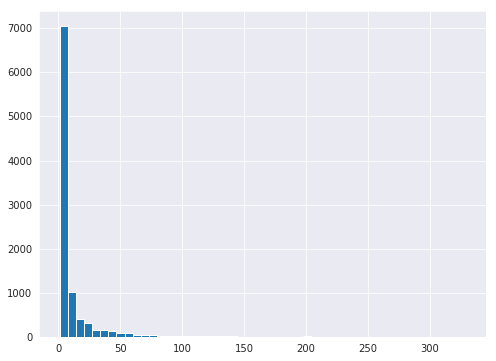

In [26]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)  

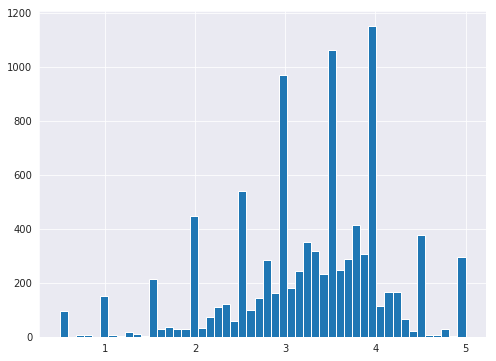

In [27]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating'].hist(bins=50) 

/Users/FatemaK/anaconda3/envs/web/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x432 with 0 Axes>

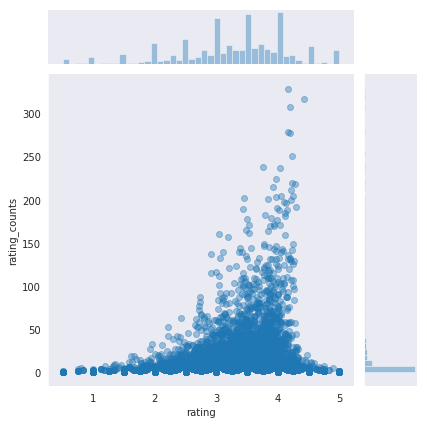

In [28]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  

To create the matrix of movie titles and corresponding user ratings

In [29]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')  

In [30]:
user_movie_rating.head()  

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

In [32]:
forrest_gump_ratings.head() 

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [33]:
forrest_gump_ratings.shape

(610,)

In [34]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation']) 
# corr_forrest_gump.dropna(inplace=True)
# corr_forrest_gump.head()  

/Users/FatemaK/anaconda3/envs/web/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/FatemaK/anaconda3/envs/web/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [35]:
corr_forrest_gump.shape

(9719, 1)

In [36]:
corr_forrest_gump.dropna(inplace=True)

In [37]:
corr_forrest_gump.shape

(5460, 1)

In [38]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10) 

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


From the output you can see that the movies that have high correlation with "Forrest Gump (1994)" are not very well known. 

A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings. To do so, will add the rating_counts column from the rating_mean_count dataframe to our corr_forrest_gump dataframe.

In [39]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])  
corr_forrest_gump.head() 

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [40]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52


The movies in the list are some of the most famous movies Hollywood movies, and since "Forest Gump (1994)" is also a very famous movie, there is a high chance that these movies are correlated.

In [41]:
corr_movie_top10 = corr_forrest_gump[corr_forrest_gump['rating_counts'] > 50].sort_values('Correlation', ascending=False).head(10).reset_index()

In [42]:
pd.merge(movies, corr_movie_top10, how = 'inner')

,movieId,title,genres,year,Correlation,rating_counts
0,3,Grumpier Old Men (1995),Comedy|Romance,1995,0.534682,52
1,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance,1995,0.550118,68
2,62,Mr. Holland's Opus (1995),Drama,1995,0.652144,80
3,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1994,1.000000,329
4,1302,Field of Dreams (1989),Children|Drama|Fantasy,1989,0.503845,56
5,1704,Good Will Hunting (1997),Drama|Romance,1997,0.484042,141
6,2268,"Few Good Men, A (1992)",Crime|Drama|Thriller,1992,0.517146,57
7,2797,Big (1988),Comedy|Drama|Fantasy|Romance,1988,0.492351,91
8,3489,Hook (1991),Adventure|Comedy|Fantasy,1991,0.484676,53
9,3552,Caddyshack (1980),Comedy,1980,0.520328,52


## Using Matrix Factorization

This is based on https://beckernick.github.io/matrix-factorization-recommender/

$$R = U\Sigma V^T$$
where $R$ is user ratings matrix, $U$ is the user “features” matrix, 
$\Sigma$ is the diagonal matrix of singular values (essentially weights), and $V^T$ is the movie “features” matrix. $U$ and $V^T$ are orthogonal, and represent different things. $U$ represents how much users “like” each feature and $V^T$ represents how relevant each feature is to each movie.

Using the larger set

In [43]:
R_df = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)

In [44]:
R_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Normalize the data by using the mean

In [45]:
R = R_df.values
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [46]:
R_demeaned

array([[ 3.89582476, -0.10417524,  3.89582476, ..., -0.10417524,
        -0.10417524, -0.10417524],
       [-0.01177499, -0.01177499, -0.01177499, ..., -0.01177499,
        -0.01177499, -0.01177499],
       [-0.00976964, -0.00976964, -0.00976964, ..., -0.00976964,
        -0.00976964, -0.00976964],
       ...,
       [ 2.23215755,  1.73215755,  1.73215755, ..., -0.26784245,
        -0.26784245, -0.26784245],
       [ 2.98755656, -0.01244344, -0.01244344, ..., -0.01244344,
        -0.01244344, -0.01244344],
       [ 4.50611888, -0.49388112, -0.49388112, ..., -0.49388112,
        -0.49388112, -0.49388112]])

### Singular Value Decomposition

In [47]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)

The function returns exactly what I detailed earlier in this post, except that the $\Sigma$ returned is just the values instead of a diagonal matrix. 

In [48]:
sigma = np.diag(sigma)

### Making Predictions from the Decomposed Matrices

In [49]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

### Making Movie Recommendations

In [50]:
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )
    
    print(sorted_user_predictions.head())

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

already_rated, predictions = recommend_movies(preds_df, 1, movies, ratings, 10)

movieId
1196    6.428209
260     6.338385
1210    6.035810
1291    6.017564
1198    5.991372
Name: 0, dtype: float64
User 1 has already rated 232 movies.
Recommending the highest 10 predicted ratings movies not already rated.


In [51]:
already_rated.head()

,userId,movieId,rating,timestamp,title,genres,year
231,1,5060,5.0,964984002,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War,1970
185,1,2872,5.0,964981680,Excalibur (1981),Adventure|Fantasy,1981
89,1,1291,5.0,964981909,Indiana Jones and the Last Crusade (1989),Action|Adventure,1989
90,1,1298,5.0,964984086,Pink Floyd: The Wall (1982),Drama|Musical,1982
190,1,2948,5.0,964982191,From Russia with Love (1963),Action|Adventure|Thriller,1963


In [52]:
predictions

,movieId,title,genres,year
736,1036,Die Hard (1988),Action|Crime|Thriller,1988
844,1221,"Godfather: Part II, The (1974)",Crime|Drama,1974
974,1387,Jaws (1975),Action|Horror,1975
615,858,"Godfather, The (1972)",Crime|Drama,1972
1328,1968,"Breakfast Club, The (1985)",Comedy|Drama,1985
874,1259,Stand by Me (1986),Adventure|Drama,1986
1927,2804,"Christmas Story, A (1983)",Children|Comedy,1983
1416,2080,Lady and the Tramp (1955),Animation|Children|Comedy|Romance,1955
2765,4011,Snatch (2000),Comedy|Crime|Thriller,2000
1417,2081,"Little Mermaid, The (1989)",Animation|Children|Comedy|Musical|Romance,1989


In [53]:
(pd.datetime.now() - pd.Timestamp("1970-01-01"))// pd.Timedelta('1s')

1544197716

In [54]:
user_ratings = ratings[ratings['userId'] == 1]

In [55]:
user_ratings.append(pd.DataFrame({'userId':[1],'movieId':[1],'rating':[3],'timestamp':[222222]}))

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [56]:
user_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [57]:
 user_ratings.loc[user_ratings.groupby(['userId','movieId'])['timestamp'].idxmax()].head() 

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [58]:
user_ratings[user_ratings['movieId'] == 999]

,userId,movieId,rating,timestamp


In [59]:
user_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [60]:
rating = 3
timestamp = 792136

In [61]:
ratings.loc[(ratings['userId'] == 1)&(ratings['movieId']==1),'rating'] = 0

In [62]:
ratings.loc[(ratings['userId'] == 1) & (ratings['movieId'] == 1), 'timestamp'] = timestamp

In [63]:
ratings.loc[(ratings['userId'] == 1) & (ratings['movieId'] == 1), 'rating'] = rating

In [64]:
ratings

,userId,movieId,rating,timestamp
0,1,1,3.0,792136
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [65]:
already_rated, predictions = recommend_movies(preds_df, 1, movies, ratings, 10)

movieId
1196    6.428209
260     6.338385
1210    6.035810
1291    6.017564
1198    5.991372
Name: 0, dtype: float64
User 1 has already rated 232 movies.
Recommending the highest 10 predicted ratings movies not already rated.


In [66]:
preds_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.167328,0.402751,0.840184,-0.076281,-0.551337,2.504091,-0.890114,-0.026443,0.196974,1.593259,...,-0.023453,-0.019967,-0.026939,-0.026939,-0.023453,-0.026939,-0.023453,-0.023453,-0.023453,-0.058732
1,0.211459,0.006658,0.033455,0.017419,0.183430,-0.062473,0.083037,0.024158,0.049330,-0.152530,...,0.019498,0.016777,0.022219,0.022219,0.019498,0.022219,0.019498,0.019498,0.019498,0.032281
2,0.003588,0.030518,0.046393,0.008176,-0.006247,0.107328,-0.012416,0.003779,0.007297,-0.059362,...,0.005909,0.006209,0.005610,0.005610,0.005909,0.005610,0.005909,0.005909,0.005909,0.008004
3,2.051549,-0.387104,-0.252199,0.087562,0.130465,0.270210,0.477835,0.040313,0.025858,-0.017365,...,0.004836,0.004172,0.005500,0.005500,0.004836,0.005500,0.004836,0.004836,0.004836,-0.023311
4,1.344738,0.778511,0.065749,0.111744,0.273144,0.584426,0.254930,0.128788,-0.085541,1.023455,...,-0.008042,-0.007419,-0.008664,-0.008664,-0.008042,-0.008664,-0.008042,-0.008042,-0.008042,-0.010127


In [67]:
preds_df.iloc[1]

movieId
1         0.211459
2         0.006658
3         0.033455
4         0.017419
5         0.183430
6        -0.062473
7         0.083037
8         0.024158
9         0.049330
10       -0.152530
11        0.077881
12        0.064805
13        0.005182
14       -0.001014
15        0.045648
16        0.096822
17       -0.027822
18       -0.004426
19        0.108646
20       -0.008286
21       -0.077978
22        0.016521
23        0.009482
24        0.023615
25       -0.212386
26        0.040676
27       -0.001671
28       -0.021906
29       -0.174248
30        0.013497
            ...   
188189   -0.005944
188301    0.014142
188675   -0.002021
188751    0.038409
188797    0.035970
188833   -0.002728
189043    0.002845
189111    0.003324
189333    0.019168
189381   -0.001314
189547   -0.001049
189713   -0.003101
190183    0.009848
190207    0.001888
190209    0.004281
190213    0.001410
190215    0.001888
190219    0.001410
190221    0.001410
191005    0.024940
193565    0.019498
1935

In [68]:
user_movie_rating = ratings.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

In [69]:
user_movie_rating

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,3.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
R

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [71]:
user_ratings_mean

array([0.10417524, 0.01177499, 0.00976964, 0.07897984, 0.01645413,
       0.11281366, 0.05049362, 0.01727684, 0.01542575, 0.0472028 ,
       0.02488688, 0.01444879, 0.01162073, 0.01676265, 0.04787125,
       0.03753599, 0.04545455, 0.19266763, 0.18850267, 0.08936652,
       0.14854998, 0.03146853, 0.04540313, 0.04128959, 0.01285479,
       0.00699301, 0.04925956, 0.1770362 , 0.03450226, 0.01655697,
       0.02015631, 0.03938708, 0.06077746, 0.03023447, 0.0096668 ,
       0.01624846, 0.00894694, 0.02581242, 0.04113534, 0.03990128,
       0.07260387, 0.16135335, 0.0533731 , 0.01655697, 0.15903949,
       0.01727684, 0.04396339, 0.0136775 , 0.00920403, 0.08864665,
       0.13939737, 0.05985191, 0.01028383, 0.01028383, 0.00730152,
       0.01799671, 0.16608392, 0.04494035, 0.04792267, 0.00843274,
       0.01624846, 0.15364048, 0.10119292, 0.2003805 , 0.01408885,
       0.14263677, 0.01470588, 0.41901481, 0.02067051, 0.02756067,
       0.01295763, 0.01923077, 0.08016248, 0.07774578, 0.02293

In [72]:
R_demeaned

array([[ 3.89582476, -0.10417524,  3.89582476, ..., -0.10417524,
        -0.10417524, -0.10417524],
       [-0.01177499, -0.01177499, -0.01177499, ..., -0.01177499,
        -0.01177499, -0.01177499],
       [-0.00976964, -0.00976964, -0.00976964, ..., -0.00976964,
        -0.00976964, -0.00976964],
       ...,
       [ 2.23215755,  1.73215755,  1.73215755, ..., -0.26784245,
        -0.26784245, -0.26784245],
       [ 2.98755656, -0.01244344, -0.01244344, ..., -0.01244344,
        -0.01244344, -0.01244344],
       [ 4.50611888, -0.49388112, -0.49388112, ..., -0.49388112,
        -0.49388112, -0.49388112]])

In [73]:
U

array([[-0.01716626,  0.00032694,  0.01194615, ...,  0.00335838,
        -0.06213084,  0.0596384 ],
       [-0.00501697, -0.0010387 ,  0.01505205, ..., -0.0012344 ,
         0.01767432,  0.00626322],
       [ 0.00065179,  0.00538272, -0.00649223, ...,  0.00067537,
        -0.00203417,  0.00064958],
       ...,
       [-0.16117225,  0.13376441, -0.05557292, ..., -0.01464468,
        -0.01227985,  0.11854893],
       [ 0.0089301 , -0.00652333, -0.00537419, ..., -0.04097903,
        -0.01400112,  0.00856716],
       [ 0.01039005, -0.00880112,  0.06333814, ...,  0.06183579,
         0.20316391,  0.12143586]])

In [74]:
sigma

array([[ 67.86628347,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  68.1967072 ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  69.02678246, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 184.86187801,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        231.22453421,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 474.20606204]])

In [75]:
Vt

array([[ 5.06053498e-02, -1.46261894e-03, -2.28232417e-03, ...,
         1.42764417e-03,  1.42764417e-03, -2.96452853e-03],
       [-2.95078801e-02,  2.17971445e-02, -2.25072247e-02, ...,
        -2.92507189e-03, -2.92507189e-03,  9.95934144e-05],
       [-6.65561487e-02, -1.43370497e-02,  2.64013814e-02, ...,
        -4.79377861e-04, -4.79377861e-04, -1.49239941e-03],
       ...,
       [-6.77263279e-02, -6.97142996e-02, -2.91611099e-02, ...,
        -2.24798857e-03, -2.24798857e-03, -2.06691001e-03],
       [-2.84008740e-02, -2.36032577e-03, -2.47048049e-02, ...,
         7.01753154e-04,  7.01753154e-04,  1.36888991e-03],
       [ 7.60983302e-02,  3.84874039e-02,  1.24439904e-02, ...,
        -5.10178162e-03, -5.10178162e-03, -4.81883687e-03]])

In [76]:
all_user_predicted_ratings

array([[ 2.16732840e+00,  4.02750508e-01,  8.40183552e-01, ...,
        -2.34533753e-02, -2.34533753e-02, -5.87318552e-02],
       [ 2.11459069e-01,  6.65755884e-03,  3.34547997e-02, ...,
         1.94980595e-02,  1.94980595e-02,  3.22813825e-02],
       [ 3.58844848e-03,  3.05175179e-02,  4.63929239e-02, ...,
         5.90929301e-03,  5.90929301e-03,  8.00411072e-03],
       ...,
       [ 2.16136388e+00,  2.67091989e+00,  2.12845971e+00, ...,
        -4.40029476e-02, -4.40029476e-02,  7.18717825e-02],
       [ 7.80205947e-01,  5.33648654e-01,  9.64537701e-02, ...,
         4.35514249e-03,  4.35514249e-03, -1.34622131e-03],
       [ 5.36398127e+00, -3.40945139e-01, -1.75163291e-01, ...,
        -2.63577616e-02, -2.63577616e-02,  5.15415792e-02]])

In [79]:
user_data = ratings[ratings.userId == 1]
user_full = (user_data.merge(movies, how='left', left_on='movieId', right_on='movieId')
            .sort_values(['rating'], ascending=False))

In [80]:
recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])])

In [82]:
user_full

,userId,movieId,rating,timestamp,title,genres,year
231,1,5060,5.0,964984002,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War,1970
185,1,2872,5.0,964981680,Excalibur (1981),Adventure|Fantasy,1981
89,1,1291,5.0,964981909,Indiana Jones and the Last Crusade (1989),Action|Adventure,1989
90,1,1298,5.0,964984086,Pink Floyd: The Wall (1982),Drama|Musical,1982
190,1,2948,5.0,964982191,From Russia with Love (1963),Action|Adventure|Thriller,1963
189,1,2947,5.0,964982176,Goldfinger (1964),Action|Adventure|Thriller,1964
188,1,2944,5.0,964981872,"Dirty Dozen, The (1967)",Action|Drama|War,1967
186,1,2899,5.0,964982703,Gulliver's Travels (1939),Adventure|Animation|Children,1939
184,1,2858,5.0,964980868,American Beauty (1999),Drama|Romance,1999
179,1,2700,5.0,964980985,"South Park: Bigger, Longer and Uncut (1999)",Animation|Comedy|Musical,1999


In [86]:
from difflib import SequenceMatcher, get_close_matches
from heapq import nlargest as _nlargest

In [87]:
    def get_close_matches_indexes(word, possibilities, n=3, cutoff=0.6):
        """Use SequenceMatcher to return a list of the indexes of the best
        "good enough" matches. word is a sequence for which close matches
        are desired (typically a string).
        possibilities is a list of sequences against which to match word
        (typically a list of strings).
        Optional arg n (default 3) is the maximum number of close matches to
        return.  n must be > 0.
        Optional arg cutoff (default 0.6) is a float in [0, 1].  Possibilities
        that don't score at least that similar to word are ignored.
        """

        if not n > 0:
            raise ValueError("n must be > 0: %r" % (n,))
        if not 0.0 <= cutoff <= 1.0:
            raise ValueError("cutoff must be in [0.0, 1.0]: %r" % (cutoff,))
        result = []
        s = SequenceMatcher()
        s.set_seq2(word)
        for idx, x in enumerate(possibilities):
            s.set_seq1(x)
            if s.real_quick_ratio() >= cutoff and \
                    s.quick_ratio() >= cutoff and \
                    s.ratio() >= cutoff:
                result.append((s.ratio(), idx))

        # Move the best scorers to head of list
        result = _nlargest(n, result)

        # Strip scores for the best n matches
        return [(x, score) for score, x in result]

In [88]:
get_close_matches_indexes("cat", movies['title'].values)

[]

In [89]:
get_close_matches("cat", movies['title'].apply(lambda x: x.lower()).values, cutoff=0, n=movies['title'].size)

['cats (1998)',
 'capote (2005)',
 'paterson',
 'tomcats (2001)',
 'scratch (2001)',
 'copycat (1995)',
 'catwalk (1996)',
 'catfish (2010)',
 'camelot (1967)',
 'cabaret (1972)',
 'wildcats (1986)',
 'vacation (2015)',
 'chocolat (2000)',
 'chocolat (1988)',
 'catwoman (2004)',
 'catch-22 (1970)',
 'blackhat (2015)',
 'backbeat (1993)',
 'macarthur (1977)',
 'enchanted (2007)',
 'class act (1992)',
 'city heat (1984)',
 'chinatown (1974)',
 'cave, the (2005)',
 'catch .44 (2011)',
 "cat's eye (1985)",
 'cast away (2000)',
 'call, the (2013)',
 'pocahontas (1995)',
 'la cravate (1957)',
 'get carter (2000)',
 'get carter (1971)',
 'dedication (2007)',
 'craft, the (1996)',
 'comandante (2003)',
 'collateral (2004)',
 'claim, the (2000)',
 'chase, the (1994)',
 'champ, the (1979)',
 'cat people (1982)',
 'cat people (1942)',
 'cat ballou (1965)',
 'apocalypto (2006)',
 'secretariat (2010)',
 'salt (2010)',
 'john carter (2012)',
 'iceman, the (2012)',
 'ice castles (1978)',
 'heat (1995

In [90]:
movie_ids = get_close_matches_indexes("high", movies['title'].apply(lambda x: x.lower()).values, cutoff=0, n=movies['title'].size)

In [91]:
movie_ids[:5]

[(9367, 0.46153846153846156),
 (9105, 0.42105263157894735),
 (5948, 0.42105263157894735),
 (3634, 0.42105263157894735),
 (1385, 0.42105263157894735)]

In [92]:
movies['title'].apply(lambda x : SequenceMatcher(None, "high", x).ratio())

0       0.000000
1       0.111111
2       0.074074
3       0.071429
4       0.105263
5       0.000000
6       0.111111
7       0.000000
8       0.086957
9       0.000000
10      0.058824
11      0.105263
12      0.000000
13      0.125000
14      0.074074
15      0.117647
16      0.062500
17      0.000000
18      0.048780
19      0.090909
20      0.095238
21      0.000000
22      0.100000
23      0.000000
24      0.142857
25      0.111111
26      0.086957
27      0.095238
28      0.089552
29      0.107143
          ...   
9712    0.066667
9713    0.064516
9714    0.117647
9715    0.102564
9716    0.142857
9717    0.097561
9718    0.095238
9719    0.117647
9720    0.050000
9721    0.000000
9722    0.086957
9723    0.000000
9724    0.142857
9725    0.133333
9726    0.052632
9727    0.100000
9728    0.086957
9729    0.000000
9730    0.037037
9731    0.111111
9732    0.137931
9733    0.068966
9734    0.086957
9735    0.093023
9736    0.136364
9737    0.088889
9738    0.062500
9739    0.1250

In [93]:
movie_score = movies['title'].apply(lambda x: SequenceMatcher(None, "high", x).ratio())
movies_list = pd.merge(movies, movie_score.to_frame('close_score'), left_index=True, right_index=True)

In [94]:
movies_list

,movieId,title,genres,year,close_score
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0.000000
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,0.111111
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0.074074
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0.071429
4,5,Father of the Bride Part II (1995),Comedy,1995,0.105263
5,6,Heat (1995),Action|Crime|Thriller,1995,0.000000
6,7,Sabrina (1995),Comedy|Romance,1995,0.111111
7,8,Tom and Huck (1995),Adventure|Children,1995,0.000000
8,9,Sudden Death (1995),Action,1995,0.086957
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995,0.000000


In [95]:
ratings['userId'].max()

610

In [96]:
pd.read_json('API/data/user_profile.json')

,movie_clicks,movie_ratings,preferred_genres,search_genres,search_ratings,search_words,search_years,user_id,user_name
0,"[{'movieId': 71230, 'count': 4}, {'movieId': 2...","[{'movieId': 71230, 'rating': 4, 'timestamp': ...","[action, war, horror]","[{'genre': 'action', 'count': 5}, {'genre': 'c...","[{'rating': 3.5, 'count': 5}, {'rating': 4, 'c...","[{'term': 'blood', 'count': 2}, {'term': 'war'...","[{'year': 2000, 'count': 5}, {'year': 2005, 'c...",1,Jack
1,"[{'movieId': 71230, 'count': 4}, {'movieId': 2...","[{'movieId': 71230, 'rating': 4, 'timestamp': ...","[action, war, horror]","[{'genre': 'action', 'count': 5}, {'genre': 'c...","[{'rating': 3.5, 'count': 5}, {'rating': 4, 'c...","[{'term': 'blood', 'count': 2}, {'term': 'war'...","[{'year': 2000, 'count': 5}, {'year': 2005, 'c...",1,Jack


In [98]:
movies_list[movies_list['movieId'] == None]

,movieId,title,genres,year,close_score


In [117]:
movies_list.drop(['movieId'], axis=1)

,title,genres,year,close_score
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0.000000
1,Jumanji (1995),Adventure|Children|Fantasy,1995,0.111111
2,Grumpier Old Men (1995),Comedy|Romance,1995,0.074074
3,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0.071429
4,Father of the Bride Part II (1995),Comedy,1995,0.105263
5,Heat (1995),Action|Crime|Thriller,1995,0.000000
6,Sabrina (1995),Comedy|Romance,1995,0.111111
7,Tom and Huck (1995),Adventure|Children,1995,0.000000
8,Sudden Death (1995),Action,1995,0.086957
9,GoldenEye (1995),Action|Adventure|Thriller,1995,0.000000


In [132]:
ratings[ratings['userId'] == 6]

,userId,movieId,rating,timestamp
560,6,2,4.0,845553522
561,6,3,5.0,845554296
562,6,4,3.0,845554349
563,6,5,5.0,845553938
564,6,6,4.0,845553757
565,6,7,4.0,845554264
566,6,8,3.0,845555281
567,6,10,3.0,845553253
568,6,11,4.0,845553489
569,6,13,3.0,845555588
